In [0]:
from google.colab import files
files.upload()

Saving challenges-in-representation-learning-facial-expression-recognition-challenge.zip to challenges-in-representation-learning-facial-expression-recognition-challenge.zip


In [0]:
from zipfile import ZipFile
file_name = "challenges-in-representation-learning-facial-expression-recognition-challenge.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
print('Done')

Done


In [0]:
!tar -xffer2013.tar.gz

In [0]:
import numpy as np

In [0]:
import tarfile

In [0]:
import pandas as pd

In [0]:
tar = tarfile.open("fer2013.tar.gz")
df = pd.read_csv(tar.extractfile("fer2013/fer2013.csv"))
df.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [0]:
df['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [0]:
train = df[['emotion','pixels']][df['Usage']=='Training']

In [0]:
train.isnull().sum() # isnull().sum() is used to count if there are any null or zero or nan value in the data

emotion    0
pixels     0
dtype: int64

In [0]:
train['pixels'] = train['pixels'].apply(lambda im: np.fromstring(im, sep=' '))
x_train = np.vstack(train['pixels'].values)  #Stack arrays in sequence vertically (row wise).
y_train = np.array(train["emotion"])
x_train.shape, y_train.shape

((28709, 2304), (28709,))

In [0]:
public_test = df[["emotion", "pixels"]][df["Usage"]=="PublicTest"]

In [0]:
public_test["pixels"] = public_test["pixels"].apply(lambda im: np.fromstring(im, sep=' '))
x_test = np.vstack(public_test["pixels"].values)
y_test = np.array(public_test["emotion"])

In [0]:
x_train = x_train.reshape(-1, 48, 48, 1)
x_test = x_test.reshape(-1, 48, 48, 1)
x_train.shape, x_test.shape

((28709, 48, 48, 1), (3589, 48, 48, 1))

In [0]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train.shape, y_test.shape

Using TensorFlow backend.


((28709, 7), (3589, 7))

In [0]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


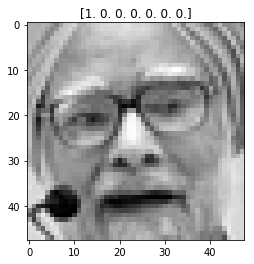

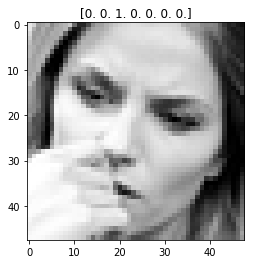

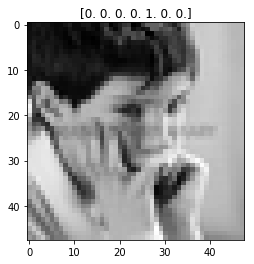

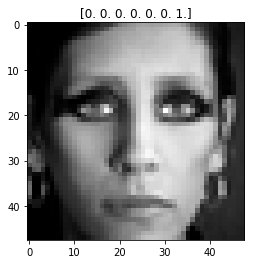

In [0]:
for i in range(1,5):
  plt.imshow(x_train[i,:, :, 0],cmap='gray')
  plt.title(y_train[i])
  plt.show()

In [0]:
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Flatten,Dense
from keras.models import Sequential,Model
from keras.layers import BatchNormalization,Dropout

In [0]:
model = Sequential()

model.add(Conv2D(64,(2,2),input_shape=(48,48,1),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))

model.add(Conv2D(128, (2,2),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(5,5),strides=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(5,5),strides=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 47, 47, 64)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 47, 47, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 21, 128)       32896     
_________________________________________________________________
batch_normalization_8 (Batch (None, 21, 21, 128)       512       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 32)          36896     
__________

In [0]:
from tensorflow import keras
from keras import optimizers

adam=optimizers.Adam(lr=0.000007)
model.compile(optimizer=adam,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
model.fit(x_train,y_train,
         epochs=5,
         batch_size=256,
         validation_data=(x_test,y_test))

Train on 28709 samples, validate on 3589 samples
Epoch 1/5
28709/28709 [==============================] - 8s 271us/step - loss: 0.0049 - acc: 0.9982 - val_loss: 2.8064 - val_acc: 0.6004
Epoch 2/5
28709/28709 [==============================] - 6s 192us/step - loss: 0.0044 - acc: 0.9981 - val_loss: 2.7980 - val_acc: 0.6018
Epoch 3/5
28709/28709 [==============================] - 6s 192us/step - loss: 0.0043 - acc: 0.9983 - val_loss: 2.7948 - val_acc: 0.6013
Epoch 4/5
28709/28709 [==============================] - 6s 193us/step - loss: 0.0040 - acc: 0.9981 - val_loss: 2.7974 - val_acc: 0.6021
Epoch 5/5
28709/28709 [==============================] - 6s 194us/step - loss: 0.0040 - acc: 0.9982 - val_loss: 2.8004 - val_acc: 0.6035


In [0]:
from google.colab import files
files.upload()

Saving haarcascade_frontalface_default.xml to haarcascade_frontalface_default.xml


{'haarcascade_frontalface_default.xml': b'<?xml version="1.0"?>\n<!--\n    Stump-based 24x24 discrete(?) adaboost frontal face detector.\n    Created by Rainer Lienhart.\n\n////////////////////////////////////////////////////////////////////////////////////////\n\n  IMPORTANT: READ BEFORE DOWNLOADING, COPYING, INSTALLING OR USING.\n\n  By downloading, copying, installing or using the software you agree to this license.\n  If you do not agree to this license, do not download, install,\n  copy or use the software.\n\n\n                        Intel License Agreement\n                For Open Source Computer Vision Library\n\n Copyright (C) 2000, Intel Corporation, all rights reserved.\n Third party copyrights are property of their respective owners.\n\n Redistribution and use in source and binary forms, with or without modification,\n are permitted provided that the following conditions are met:\n\n   * Redistribution\'s of source code must retain the above copyright notice,\n     this l

In [0]:
from google.colab import files
files.upload()

Saving capture.jpg to capture.jpg


{'capture.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x12\x12\x15\x10\x12\x10\x15\x15\x10\x12\x15\x0f\x15\x10\x15\x0f\x15\x15\x15\x15\x15\x15\x15\x15\x17\x16\x15\x15\x15\x15\x18\x1d( \x18\x1a%\x1b\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x17\x10\x10\x18-\x1d\x1d\x1d-+--+----+---------+-+-+--++---------+----++--+---\xff\xc0\x00\x11\x08\x00\xa2\x016\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x02\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x06\x03\x05\x00\x02\x07\x01\xff\xc4\x009\x10\x00\x01\x03\x02\x04\x04\x03\x06\x05\x04\x02\x03\x01\x00\x00\x00\x01\x00\x02\x03\x04\x11\x05\x12!1\x06AQa"q\x81\x132B\x91\xa1\xb1\x07\x14#\xc1\xd1Rbr\xe1\x82\xf03S\x92\x16\xff\xc4\x00\x1a\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x05\x06\xff\xc4\x00(\x11\x00\x02\x02\x02\x02\x02\x02\x01\x03\x05\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03!\x121\x04A2Q\x13

In [0]:
import cv2
            
def facecrop(image):  
    facedata = "haarcascade_frontalface_default.xml"
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('test2.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)

    #cv2.imshow(image, img)


if __name__ == '__main__':
    facecrop('photo.jpg')


In [0]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


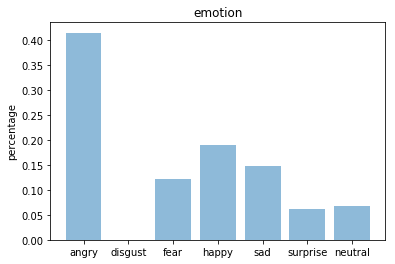

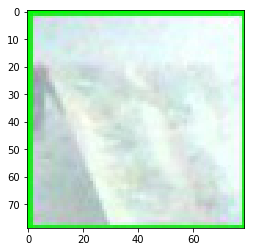

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = 'test2.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))


x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()

In [0]:
import cv2
from google.colab.patches import cv2_imshow

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'